## Medical Insurance Cost Prediction 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from utils import *
import copy
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Loading Dataset
ds = pd.read_csv("/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv")

In [3]:
ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
#get all categorical columns
cat_columns = ds.select_dtypes(['object']).columns

#convert all categorical columns to numeric
ds[cat_columns] = ds[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [5]:
ds

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,1,1,8569.86180
2768,21,0,34.600,0,1,0,2020.17700
2769,19,1,26.030,1,0,2,16450.89470
2770,23,1,18.715,0,1,2,21595.38229


In [6]:
# info of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [7]:
# Check for the missing values in the dataset
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# view statistics of dataset
ds.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.796537,1.467532,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.103467,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,1.000000,1.000000,4687.797000
50%,39.000000,1.000000,30.447500,1.000000,1.000000,1.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,1.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [9]:
# view columns
ds.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
# Visualise the data
ds.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [11]:
ds.tail(5)

,age,sex,bmi,children,smoker,region,charges
2767,47,0,45.320,1,1,1,8569.86180
2768,21,0,34.600,0,1,0,2020.17700
2769,19,1,26.030,1,0,2,16450.89470
2770,23,1,18.715,0,1,2,21595.38229
2771,54,1,31.600,0,1,0,9850.43200


In [12]:
#check dimensions of dataset
ds.shape

(2772, 7)

In [13]:
# Spliting dataset into input and output (i.e x and y)
x = ds.iloc[:,:6]
y = ds.iloc[:,6]

In [14]:
# visualise x and y
print("x : ",x)
print()
print("y : ",y)

x :        age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       0
1      18    1  33.770         1       1       1
2      28    1  33.000         3       1       1
3      33    1  22.705         0       1       2
4      32    1  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
2767   47    0  45.320         1       1       1
2768   21    0  34.600         0       1       0
2769   19    1  26.030         1       0       2
2770   23    1  18.715         0       1       2
2771   54    1  31.600         0       1       0

[2772 rows x 6 columns]

y :  0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [15]:
# Scaling input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [16]:
# Spliting x and y into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2079, 6)
(2079,)
(693, 6)
(693,)


In [17]:
# visualise data
print("First five elements in X_train are:\n", x_train[:5])
print("Type of X_train:",type(x_train))
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in X_train are:
 [[-1.28629675  0.98567261 -0.54522882 -0.9070836   0.50540556  1.38902589]
 [ 0.98660498  0.98567261 -1.0412846  -0.9070836   0.50540556  0.48262764]
 [ 0.70249227  0.98567261  0.03241509 -0.9070836  -1.97860901 -1.33016886]
 [ 0.77352045 -1.01453565 -0.73124974  0.73956718  0.50540556  0.48262764]
 [ 0.77352045  0.98567261 -0.70024625 -0.9070836   0.50540556  0.48262764]]
Type of X_train: <class 'numpy.ndarray'>
First five elements in y_train are:
 2076     2104.1134
2069     9863.4718
1049    39727.6140
1107    10493.9458
2130     8827.2099
Name: charges, dtype: float64
Type of y_train: <class 'pandas.core.series.Series'>


In [18]:
# Check the dimensions of data
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (2079, 6)
The shape of y_train is: (2079,)
We have m = 2079 training examples


In [19]:
# convert pandas series to numpy ndarray
y_train = y_train.to_numpy()

In [20]:
y_train

array([ 2104.1134 ,  9863.4718 , 39727.614  , ...,  6185.3208 ,
        5327.40025,  4337.7352 ])

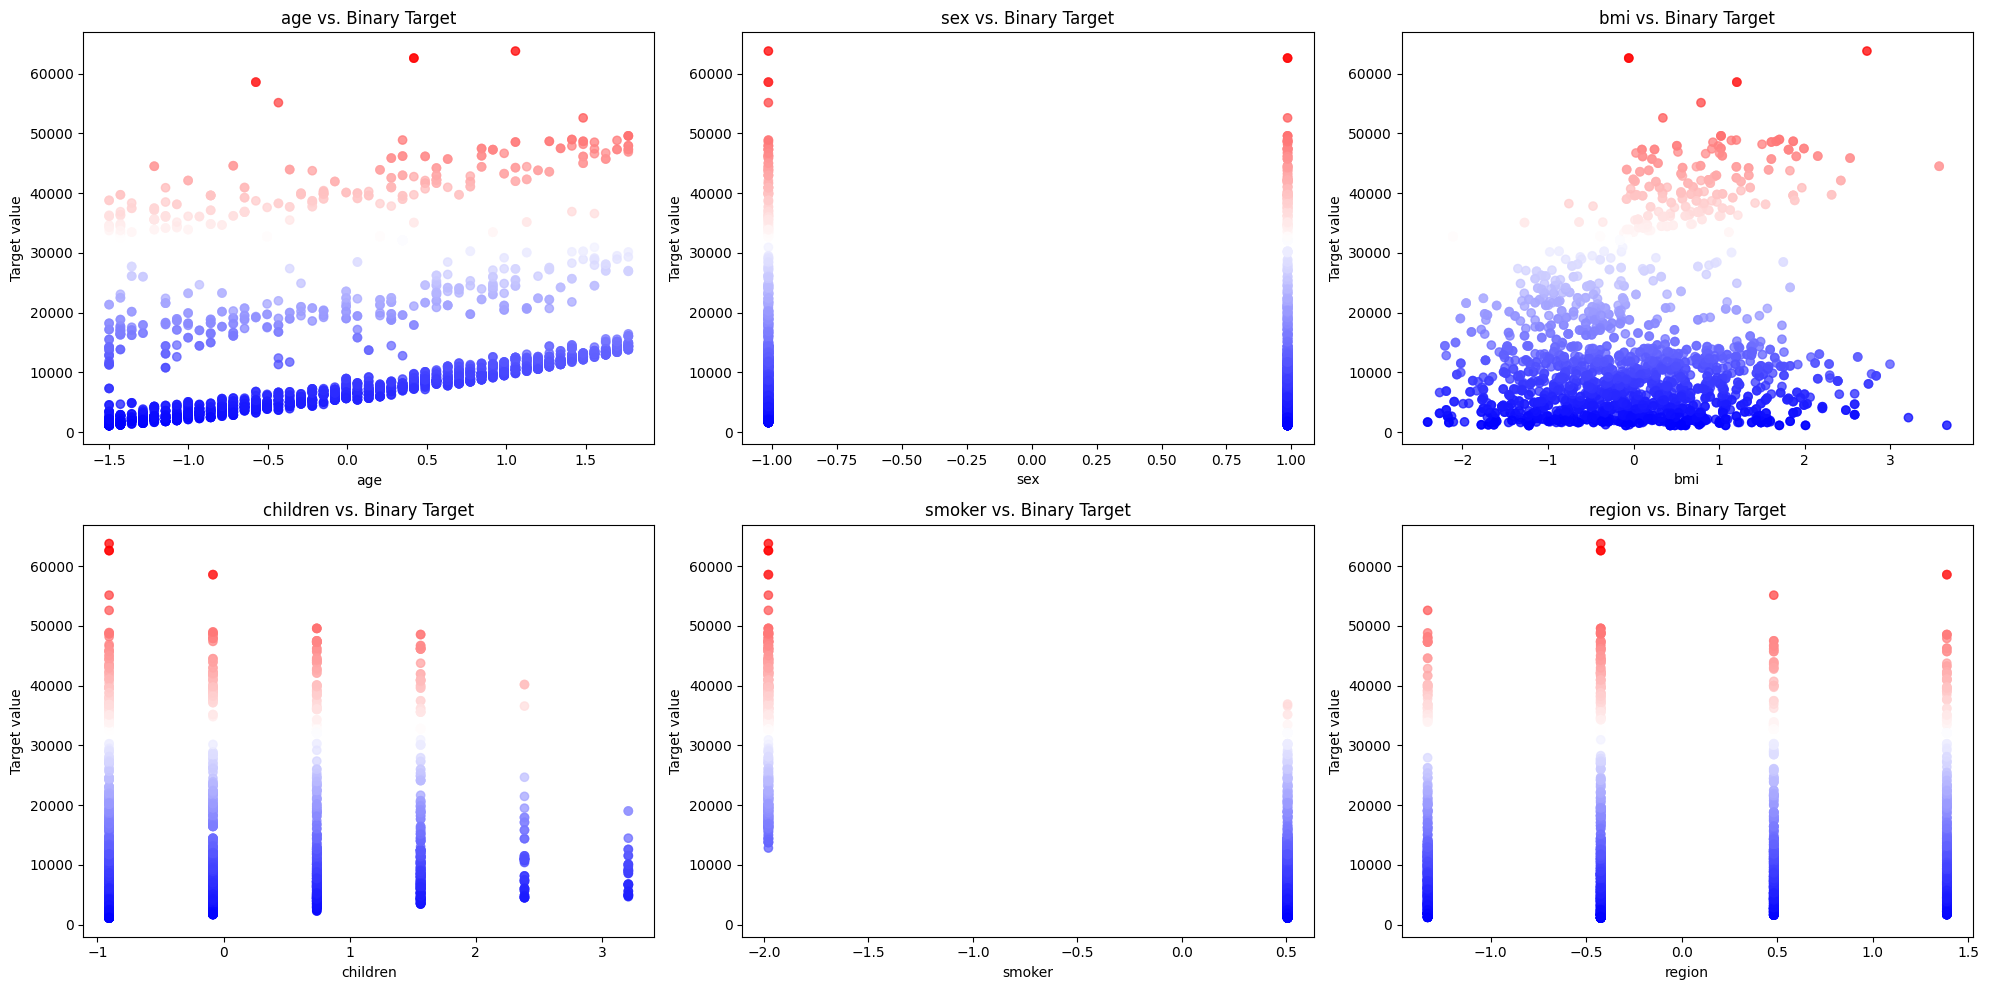

In [21]:
# Visualize data
# plotting each features against the output variable y

y_train = y_train.reshape(-1)

# list of feature names
features = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot each feature against the binary target
for k in range(6):  # We only have 8 subplots, adjust as necessary
    i = k // 3  # Row index
    j = k % 3  # Column index
    axes[i, j].scatter(x_train[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75)
    axes[i, j].set_title(f'{features[k]} vs. Binary Target')
    axes[i, j].set_xlabel(features[k])
    axes[i, j].set_ylabel('Target value')
# Adjust layout
plt.tight_layout()
plt.show()

## Model Training

In [22]:
# Cost function for linear regression
def compute_cost(x, y, w, b):
    # number of training examples
    m = x.shape[0]
    
    total_cost = 0
    
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
        
    total_cost = cost / (2*m)
    
    return total_cost   

In [23]:
# Gradient for linear regression
def compute_gradient(x, y, w, b):
    # number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [24]:
# Learning parameters using batch gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # number of training examples
    m = x.shape[0]
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in) # avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # calculate gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # save cost J at each iteration
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
            
        # print cost at every intervals of 10 items or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1][0]):8.2f}   ")
            
    return w, b, J_history, w_history

In [36]:
initial_w = np.zeros(x_train.shape[1])
initial_b = 0.

iterations = 10000
alpha = 0.001

w, b, J_, w_ = gradient_descent(x_train, y_train, initial_w, initial_b, 
                            compute_cost, compute_gradient, alpha, iterations)
print("w & b found by gradient descent : ", w, b)
# print("J_history : ", J_)

Iteration    0: Cost 162321721.02   
Iteration 1000: Cost 81534926.53   
Iteration 2000: Cost 70320476.34   
Iteration 3000: Cost 68683840.35   
Iteration 4000: Cost 68419726.61   
Iteration 5000: Cost 68369089.24   
Iteration 6000: Cost 68357026.98   
Iteration 7000: Cost 68353567.01   
Iteration 8000: Cost 68352457.34   
Iteration 9000: Cost 68352082.60   
w & b found by gradient descent :  [ 3.59806772e+03  9.39898442e+00  1.95482118e+03  6.91867531e+02
 -9.70322393e+03  3.10785286e+02] 13141.21559782774


In [37]:
m = x_train.shape[0]
predicted =  np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w, x_train[i]) + b

In [38]:
# def mean_absolute_error(y_true, y_pred):
#     return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [39]:
# mae = mean_absolute_error(y_train, predicted)
mse = mean_squared_error(y_train, predicted)
rmse = root_mean_squared_error(y_train, predicted)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 34821226.82
Root Mean Squared Error (RMSE): 5900.95


In [40]:
m = x_test.shape[0]
predicted =  np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w, x_test[i]) + b

In [41]:
# mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = root_mean_squared_error(y_test, predicted)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 42854105.22
Root Mean Squared Error (RMSE): 6546.30


In [32]:
# # Plot the linear fit
# plt.plot(x_train[:,5], predicted, c = "b")

# # Create a scatter plot of the data. 
# plt.scatter(x_train[:,5], y_train, marker='x', c='r') 

# # Set the title
# plt.title("Region vs Medical Insurance cost")
# # Set the y-axis label
# plt.ylabel("Medical Insurance cost")
# # Set the x-axis label
# plt.xlabel("Region")
# x_train.shape
# y_train.shape

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


# x_train = x_train.reshape(-1, 1)

model.fit(x_train, y_train)



m = x_train.shape[0]
predicted = np.zeros(m)


# predicted = model.predict(x_train)

print(model.coef_)
print(model.intercept_)

[ 3.59848974e+03  9.10401979e+00  1.95466310e+03  6.91824339e+02
 -9.70366222e+03  3.10827495e+02]
13141.793022069327


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predicted = model.predict(x_train)

# mae = mean_absolute_error(y_train, predicted)
mse = mean_squared_error(y_train, predicted)
rmse = np.sqrt(mse)

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 34821226.04
Root Mean Squared Error (RMSE): 5900.95


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predicted = model.predict(x_test)

# mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 42853591.31
Root Mean Squared Error (RMSE): 6546.27
